# Task 1: Quantum Computing Part

Running <b>%pylab inline</b> to easily plot the Probablity and importing <b>cirq</b> to access 
Circuit, Simulate, etc.

In [1]:
%pylab inline
import cirq

Populating the interactive namespace from numpy and matplotlib


## Part 1

The function defined below implements the follwing quantum operations:
- Hadamard operation on every qubit.
- CNOT operation (0,1), (1,2), (2,3), (3,4).
- SWAP (0,4).
- Rotate X with pi/2 on any qubit.

In [2]:
def Quantum_Operation(input):
    operations = []
    
    # Applying Hadamard operation on every qubit
    for i in input:
        operations.append( cirq.H(i) )
        
    # Applying the required CNOT operations.
    for i in range(4):
        operations.append(cirq.CNOT(input[i], input[i+1]))
        
    # Swapping (0,4)
    operations.append( cirq.SWAP(input[0], input[4]) )
    
    # Roatating X with pi/2 on a random qubit
    operations.append(cirq.rx(numpy.pi/2)
                          (Qubits[numpy.random.randint(5)]))
    
    circuit = cirq.Circuit(operations)
    return circuit

### Plot

We now define 5 qubits to run the above operations on and Plot the Circuit:

In [3]:
Qubits = [ cirq.NamedQubit(str(i)) for i in range(5) ]
Quantum_Operation(Qubits)

0: ───H───@───────────────×──────────────
          │               │
1: ───H───X───@───────────┼──────────────
              │           │
2: ───H───────X───@───────┼──────────────
                  │       │
3: ───H───────────X───@───┼──────────────
                      │   │
4: ───H───────────────X───×───Rx(0.5π)───

## Part 2

A Computation Simulation is performed to plot the Probablity of |0⟩ with consecutive delta rotations. <br>
Delta = 3° <br>
Number of Rotations = 360 <br>
Range of X rotation = [0,6π]

In [4]:
qbit = cirq.NamedQubit('qbit')
simulator = cirq.Simulator()
delta = numpy.pi / 60
circuit = cirq.Circuit( [ cirq.rx(delta)(qbit) for i in range(360) ] )
circuit

qbit: ───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───Rx(0.017π)───

Each Rotation is simulated iteratively followed by measurement of the Probality of |0⟩.

In [5]:
probablity = []
for i in simulator.simulate_moment_steps(circuit):
    prob = np.abs(i.state_vector()) **2
    probablity.append(prob[0])

### Probablity of |0⟩ vs Number of 𝛿 rotations

Probablity of measuring |0⟩ state


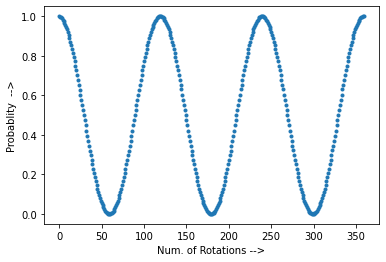

In [6]:
plot(probablity, ".")
ylabel("Probablity  -->")
xlabel("Num. of Rotations -->")
print("Probablity of measuring |0⟩ state")